# grabbing images from: https://esahubble.org/images/archive/category/galaxies/

# - note: I've added changing instruments to playnote in midi_track to attempt to force mingus to save out instrument info, doesnt seem to work

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import time
from mike_code import LaguerreAmplitudes
from functionalities import *
import matplotlib.cm as cm
from skimage.transform import resize_local_mean
from mingus.midi import midi_file_out
#https://github.com/musalbas/musicalpackets/issues/17

In [2]:

######
#need to initialize fluidsynth with our soundfont - this just tells fluidsynth where our sounds live
fluidsynth.init("/Users/caf/Developer/sonify/env/GeneralUser GS 1.471/soundfont.sf2")
#coreaudio, file, portaudio seem to be only viable options
#possible drivers:  ‘alsa’, ‘oss’, ‘jack’, ‘portaudio’, ‘sndmgr’, ‘coreaudio’, ‘Direct Sound’, ‘dsound’, ‘pulseaudio’

#####################
#### setting instruments for positive, negative channels
#####################
fluidsynth.set_instrument(1,1) #put piano on channel 1 - positive notes will be piano
fluidsynth.set_instrument(2,49) #put string ensemble on channel 2 - negative notes will be strings

returning coscoefs, sincoefs
max, min, median of reconstruction: 293.8810635575646 1.4583489220879455 24.537836969450765
max, min, median of original image: 253.45608718766618 7.390005316321107 24.682801701222765
returning reconstruction, cosine coefficients, and sine coefficients


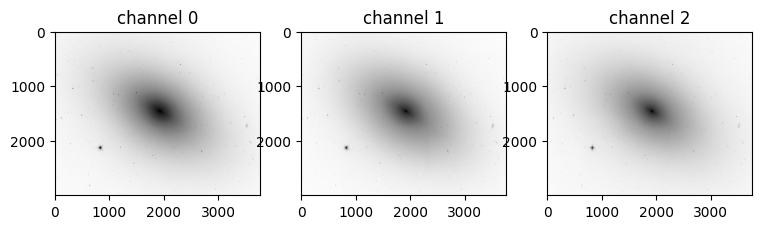

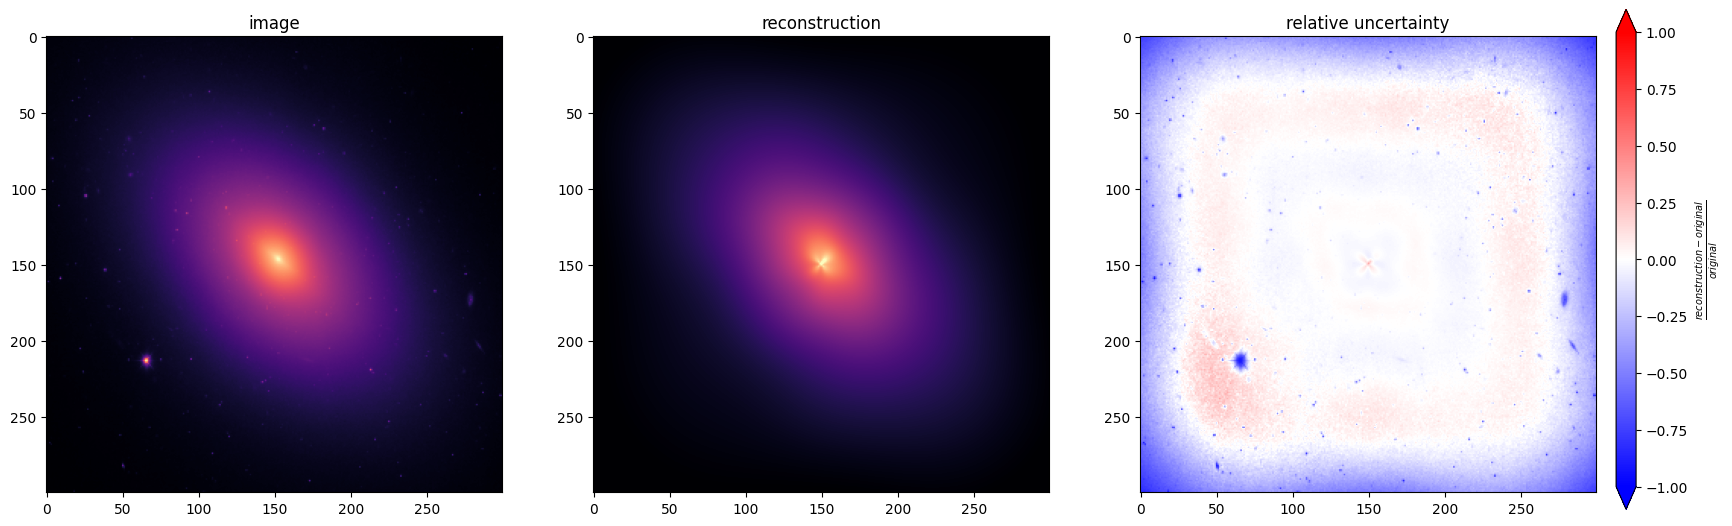

In [3]:
#image_path, rescale_factor, rscale, recon_lims, save_loc = None, savestr = None
# ---- note: here I am DOWNSCALING the image so that everything runs faster. I save out the higher res version with the commented out info

recon, cos_cos, sin_cos = beef_it('high_qual_elliptical_ngc4621.tif', rescale_factor=.1, 
                                  rscale=500, recon_lims=3000)#, save_loc = './', savestr = 'ngc4621_recon')

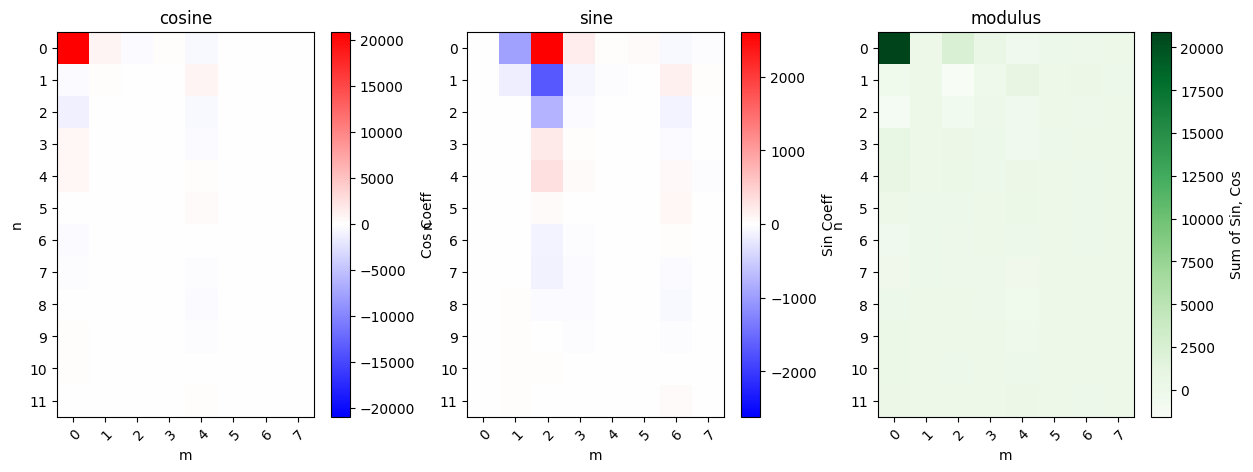

In [4]:
plot_coefficients_modulus(cosco= cos_cos, sinco=sin_cos)

In [5]:
note_tote_e, note_cos_e, note_sin_e = map_to_sounds(cos_cos, sin_cos, mmax = 8, nmax = 12)
#play the sounds for bar!

returning full set of notes, followed by notes from the cosine coefficients and notes from the sin coefficients


# barred spiral -

returning coscoefs, sincoefs
max, min, median of reconstruction: 256.2563192641174 -0.11384187100972523 59.03599954649282
max, min, median of original image: 254.99999999999997 2.282845684076202 57.0799972655182
returning reconstruction, cosine coefficients, and sine coefficients


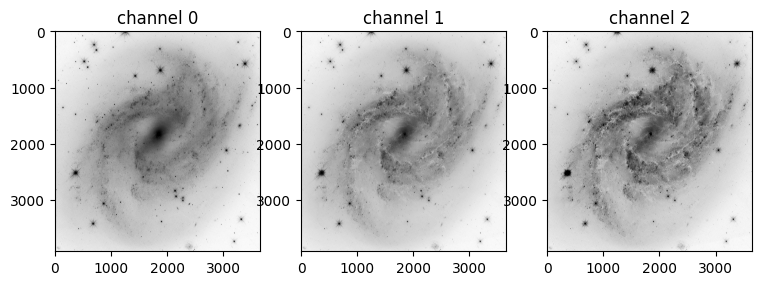

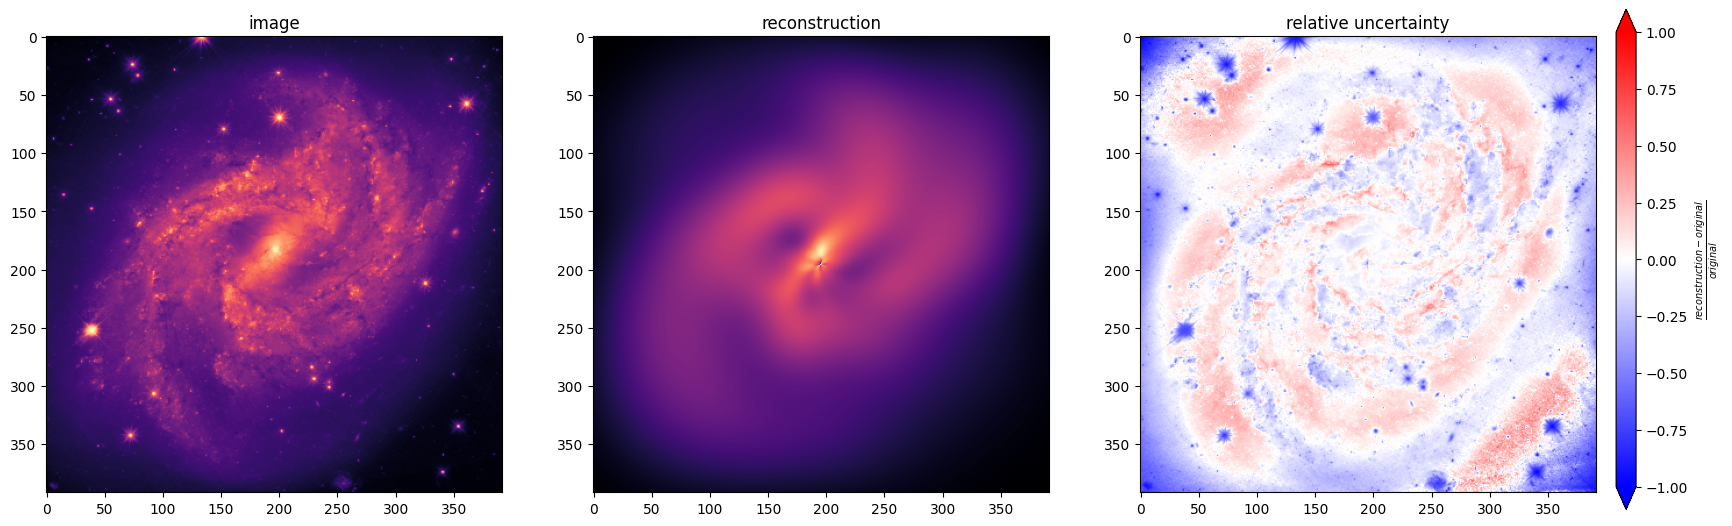

In [6]:
#image_path, rescale_factor, rscale, recon_lims, save_loc = None, savestr = None
# ---- note: here I am DOWNSCALING the image so that everything runs faster. I save out the higher res version with the commented out info
recon, bs_cos_cos, bs_sin_cos = beef_it('high_qual_barredspiral_ngc2525.tif', rescale_factor=.1, 
                                  rscale=450, recon_lims=3200)#, save_loc = './', savestr = 'ngc2525_recon') #300 bad, 500 bad, 200 bad
#400, 450 is p good

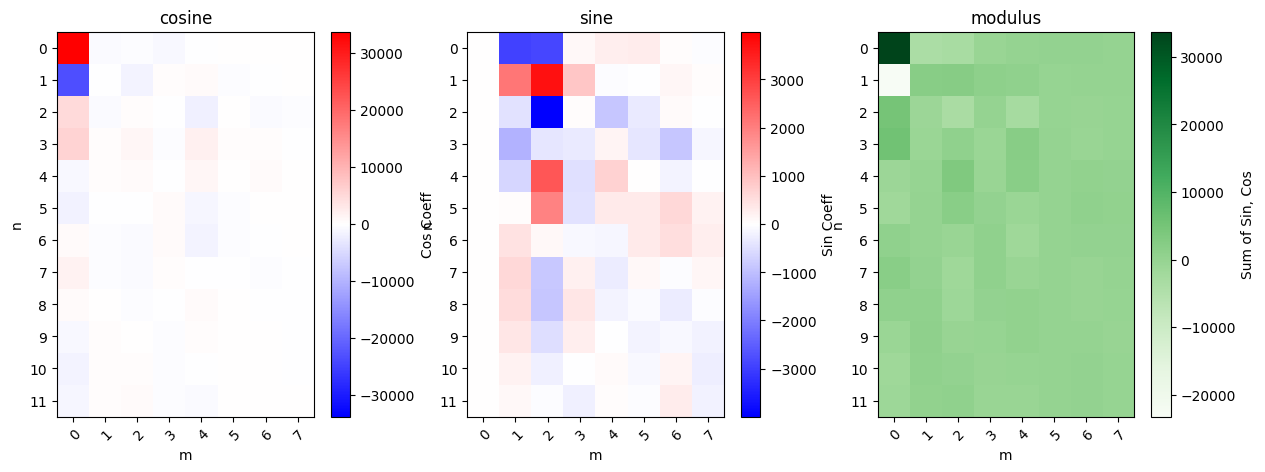

In [7]:
plot_coefficients_modulus(cosco= bs_cos_cos, sinco=bs_sin_cos)

In [8]:
note_tote_bs, note_cos_bs, note_sin_bs = map_to_sounds(bs_cos_cos, bs_sin_cos, mmax = 8, nmax = 12)


returning full set of notes, followed by notes from the cosine coefficients and notes from the sin coefficients


# Bar + ring

returning coscoefs, sincoefs
max, min, median of reconstruction: 467.26872873019755 -0.2568109802525931 62.56178602673314
max, min, median of original image: 254.00000000000009 7.4630411831955605 60.34310027610238
returning reconstruction, cosine coefficients, and sine coefficients


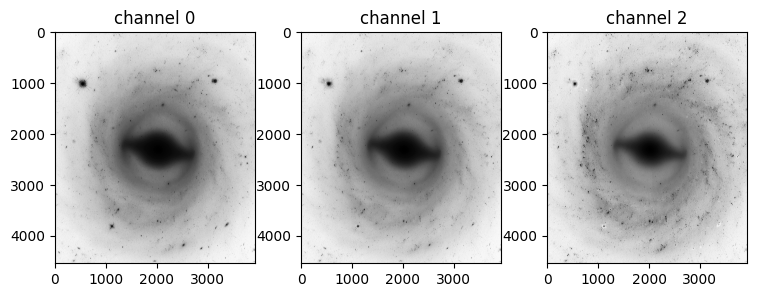

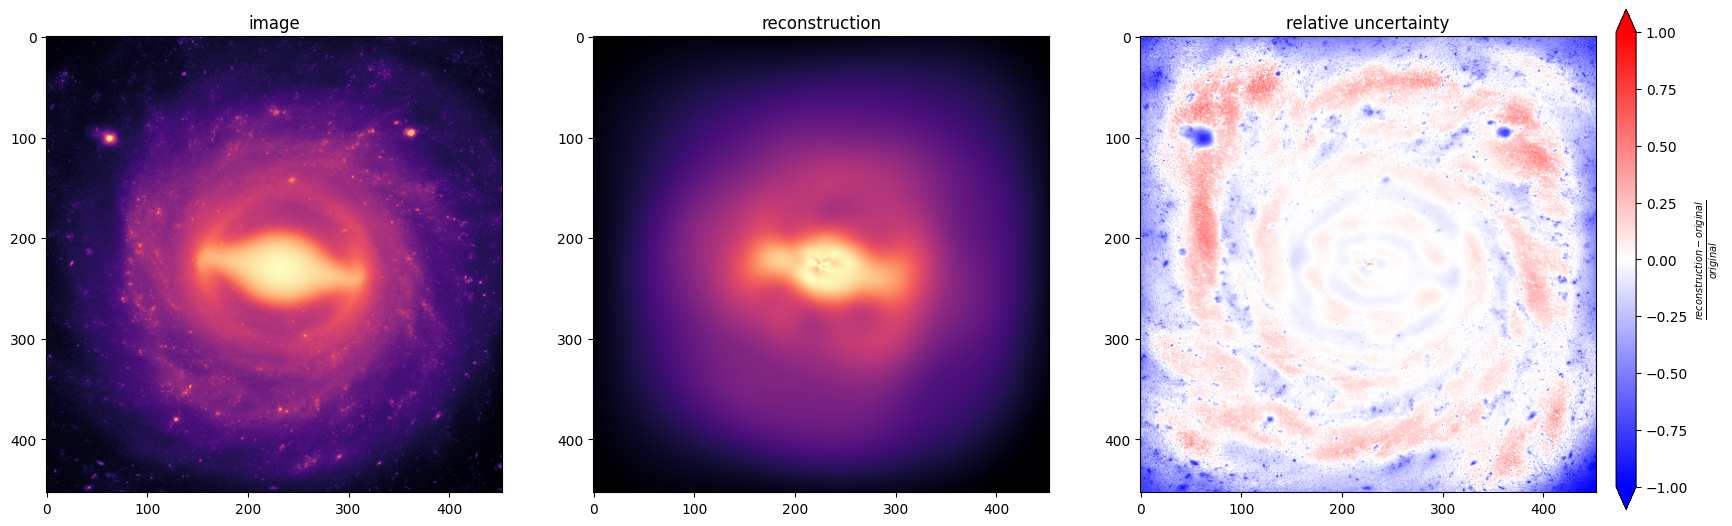

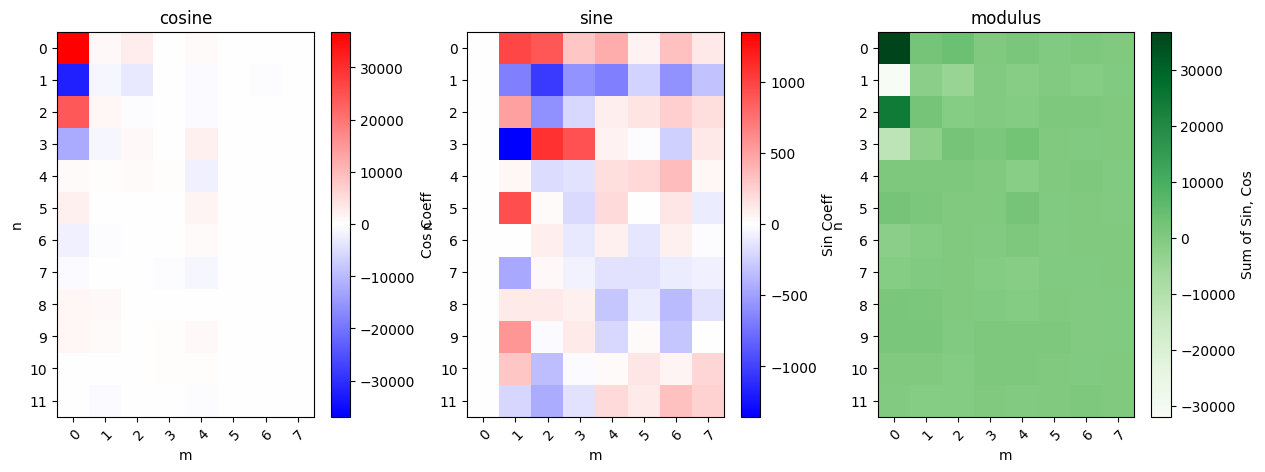

In [9]:
#image_path, rescale_factor, rscale, recon_lims, save_loc = None, savestr = None
# ---- note: here I am DOWNSCALING the image so that everything runs faster. I save out the higher res version with the commented out info
recon, br_cos_cos, br_sin_cos = beef_it('high_qual_barring_ngc1015.tif', rescale_factor=.1, 
                                  rscale=300, recon_lims=3200)#,
#                                          save_loc = './', savestr = 'ngc1015_recon') 
plot_coefficients_modulus(br_cos_cos, br_sin_cos)

In [10]:
note_tote_br, note_cos_br, note_sin_br = map_to_sounds(br_cos_cos, br_sin_cos, mmax = 8, nmax = 12)
#play the sounds for bar!

returning full set of notes, followed by notes from the cosine coefficients and notes from the sin coefficients


## playing, saving out barred spiral

In [15]:
midi_file_out.write_NoteContainer("ngc2525_barspiral_sound.mid", note_tote_bs, bpm=10, verbose=True)

Written 515 bytes to ngc2525_barspiral_sound.mid.


True

In [ ]:
#below is saving out to .wav file - run in command line

In [16]:
! fluidsynth -F ngc2525_barspiral_sound.wav /Users/caf/Developer/sonify/env/GeneralUser\ GS\ 1.471/soundfont.sf2 ngc2525_barspiral_sound.mid

FluidSynth runtime version 2.3.3
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'ngc2525_barspiral_sound.wav'..


In [17]:
fluidsynth.play_NoteContainer(note_tote_br, channel=[note.channel for note in note_tote_br])
time.sleep(2)
fluidsynth.stop_NoteContainer(NoteContainer(note_tote_br))
midi_file_out.write_NoteContainer("ngc1015_barring_sound.mid", note_tote_br, bpm=10)
! fluidsynth -F ngc1015_barring_sound.wav /Users/caf/Developer/sonify/env/GeneralUser\ GS\ 1.471/soundfont.sf2 ngc1015_barring_sound.mid

FluidSynth runtime version 2.3.3
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'ngc1015_barring_sound.wav'..


In [18]:
fluidsynth.play_NoteContainer(note_tote_e, channel=[note.channel for note in note_tote_e])
time.sleep(2)
fluidsynth.stop_NoteContainer(NoteContainer(note_tote_e))

True

In [19]:
midi_file_out.write_NoteContainer("ngc4621_elliptical_sound.mid", note_tote_e, bpm=10)
! fluidsynth -F ngc4621_elliptical_sound.wav /Users/caf/Developer/sonify/env/GeneralUser\ GS\ 1.471/soundfont.sf2 ngc4621_elliptical_sound.mid

FluidSynth runtime version 2.3.3
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'ngc4621_elliptical_sound.wav'..
